In [ ]:
#problem statement :
'''Prepare and process raw logistics data to generate clean, structured, and enriched features that enable
 the data science team to build accurate forecasting models.The goal is to analyze data
 from Delhivery to understand time and distance efficiency, outliers, and route performance.
 The data contains multiple segments per trip, and we need to aggregate trips,
 engineer features, and gain insights to recommend business improvements.'''


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
df.shape

(144867, 24)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.info()
#here we can see source_name and destination_name have some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

Missing Values Per Column:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [ ]:
# converting the time columns to pandas datetime
time_cols = [
    'trip_creation_time',
    'od_start_time',
    'od_end_time',
    'cutoff_timestamp'
]

for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[time_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trip_creation_time  144867 non-null  datetime64[ns]
 1   od_start_time       144867 non-null  datetime64[ns]
 2   od_end_time         144867 non-null  datetime64[ns]
 3   cutoff_timestamp    141438 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.4 MB


In [ ]:
print("Shape:", df.shape)
print("Column Types:\n", df.dtypes)


Shape: (144867, 24)
Column Types:
 data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                            

In [ ]:
print("\nNumerical Stats:\n", df.describe())
print("\nCategorical Stats:\n", df.describe(include='object'))



Numerical Stats:
                   trip_creation_time                  od_start_time  \
count                         144867                         144867   
mean   2018-09-22 13:34:23.659819264  2018-09-22 18:02:45.855230720   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 03:20:51.775845888  2018-09-17 08:05:40.886155008   
50%    2018-09-22 04:24:27.932764928  2018-09-22 08:53:00.116656128   
75%    2018-09-27 17:57:56.350054912  2018-09-27 22:41:50.285857024   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  cutoff_factor  \
count                         144867           144867.000000  144867.000000   
mean   2018-09-23 10:04:31.395393024              961.262986     232.926567   
min       2018-09-12 00:50:10.814399               20.000000       9.000000   
25%    2018-09-18 01:48:0

In [ ]:
print("Unique trip_uuids:", df['trip_uuid'].nunique())
print("Unique source_centers:", df['source_center'].nunique())
print("Unique destination_centers:", df['destination_center'].nunique())
print("Route types:\n", df['route_type'].value_counts())


Unique trip_uuids: 14817
Unique source_centers: 1508
Unique destination_centers: 1481
Route types:
 route_type
FTL        99660
Carting    45207
Name: count, dtype: int64


In [ ]:
df['segment_key'] = (
    df['trip_uuid'].astype(str) + '_' +
    df['source_center'].astype(str) + '_' +
    df['destination_center'].astype(str)
)


In [ ]:
df = df.sort_values(by=['segment_key', 'od_start_time'])
cumsum_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
for col in cumsum_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()


In [ ]:
create_segment_dict = {
    # IDs and identifiers - keep first or last as they do not aggregate meaningfully
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',

    # Time columns - you can keep first start time, last end time
    'od_start_time': 'first',
    'od_end_time': 'last',
    'trip_creation_time': 'first',
    'cutoff_timestamp': 'first',

    # Numeric cumulative columns - sum makes sense
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum',
    'actual_distance_to_destination': 'sum',  # or 'mean' if preferred

    # Other numeric fields - choose an aggregation or just take first if unsure
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',

    'route_type': 'first',
    'is_cutoff': 'first',

    'factor': 'mean',
    'cutoff_factor': 'mean',
    'segment_factor': 'mean',
    'start_scan_to_end_scan': 'sum'
}


In [ ]:
# Group by 'segment_key' and aggregate according to create_segment_dict
segment_agg_df = df.groupby('segment_key').agg(create_segment_dict).reset_index()



In [ ]:

segment_agg_df = segment_agg_df.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True]).reset_index(drop=True)

#  sorted DataFrame
segment_agg_df.head()

,segment_key,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,trip_creation_time,cutoff_timestamp,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,route_type,is_cutoff,factor,cutoff_factor,segment_factor,start_scan_to_end_scan
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2018-09-12 00:00:16.535741,2018-09-13 12:40:43,...,3778.765471,6484.0,3464.0,4540.1261,FTL,True,1.741964,208.277778,1.893007,22680.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-12 00:00:16.535741,2018-09-12 14:56:29,...,5082.046634,9198.0,4323.0,6037.6386,FTL,True,2.150702,240.952381,2.134213,20979.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,2018-09-12 00:00:22.886430,2018-09-12 02:41:24,...,53.310332,96.0,55.0,60.3157,Carting,True,1.746424,17.000000,1.795767,174.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 00:00:22.886430,2018-09-12 01:39:28,...,186.897974,303.0,155.0,209.1151,Carting,True,1.875977,30.500000,2.912963,732.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,2018-09-12 00:00:33.691250,2018-09-14 16:54:36,...,1725.590250,2601.0,1427.0,1975.7409,FTL,True,1.737898,140.750000,2.326577,10008.0


In [ ]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600


In [ ]:
import re
df['destination_city'] = df['destination_name'].str.extract(r'^([^-()]+)')
df['destination_place_code'] = df['destination_name'].str.extract(r'-(\w+)')
df['destination_state'] = df['destination_name'].str.extract(r'\(([^)]+)\)')
df['source_city'] = df['source_name'].str.extract(r'^([^-()]+)')
df['source_place_code'] = df['source_name'].str.extract(r'-(\w+)')
df['source_state'] = df['source_name'].str.extract(r'\(([^)]+)\)')



In [ ]:
df['creation_year'] = df['trip_creation_time'].dt.year
df['creation_month'] = df['trip_creation_time'].dt.month
df['creation_day'] = df['trip_creation_time'].dt.day
df['creation_weekday'] = df['trip_creation_time'].dt.weekday
df['creation_hour'] = df['trip_creation_time'].dt.hour
df = df.drop(columns=['trip_creation_time'])


In [ ]:
create_trip_dict = {

    'trip_uuid': 'first',  # Though grouping by this, it can be handy to keep

    # Take first starting timestamps and last ending timestamps at trip level
    'trip_creation_time': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'cutoff_timestamp': 'first',

    # Sum cumulative numeric fields relevant at trip-level
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',

    # For categorical fields like route_type, take first or mode if needed
    'route_type': 'first',

    # Any other relevant numeric or categorical fields
    'start_scan_to_end_scan': 'sum',

    # For unknown/factor fields, aggregate with mean
    'factor': 'mean',
    'cutoff_factor': 'mean',
    'segment_factor': 'mean',

    # Source and destination fields — first and last to keep endpoints
    'source_center': 'first',
    'destination_center': 'last',
    'source_name': 'first',
    'destination_name': 'last',
}


In [ ]:
trip_level_df = segment_agg_df.groupby('trip_uuid').agg(create_trip_dict)

In [ ]:
trip_level_df['od_time_diff_hour'] = (trip_level_df['od_end_time'] - trip_level_df['od_start_time']).dt.total_seconds() / 3600


In [ ]:
# 1. Find Existing Outliers Using the IQR method
numeric_cols = [
    'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
    'actual_time', 'osrm_time', 'osrm_distance', 'od_time_diff_hour'
]

outlier_bounds = {}
for col in numeric_cols:
    Q1 = trip_level_df[col].quantile(0.25)
    Q3 = trip_level_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)
    print(f"{col} -> Lower bound: {lower_bound}, Upper bound: {upper_bound}")


segment_actual_time -> Lower bound: -385.5, Upper bound: 818.5
segment_osrm_time -> Lower bound: -200.0, Upper bound: 416.0
segment_osrm_distance -> Lower bound: -246.56735000000003, Upper bound: 498.02425000000005
actual_time -> Lower bound: -1239.5, Upper bound: 2444.5
osrm_time -> Lower bound: -619.0, Upper bound: 1197.0
osrm_distance -> Lower bound: -747.1696000000001, Upper bound: 1420.5856
od_time_diff_hour -> Lower bound: -6.139017125555554, Upper bound: 14.458714696666664


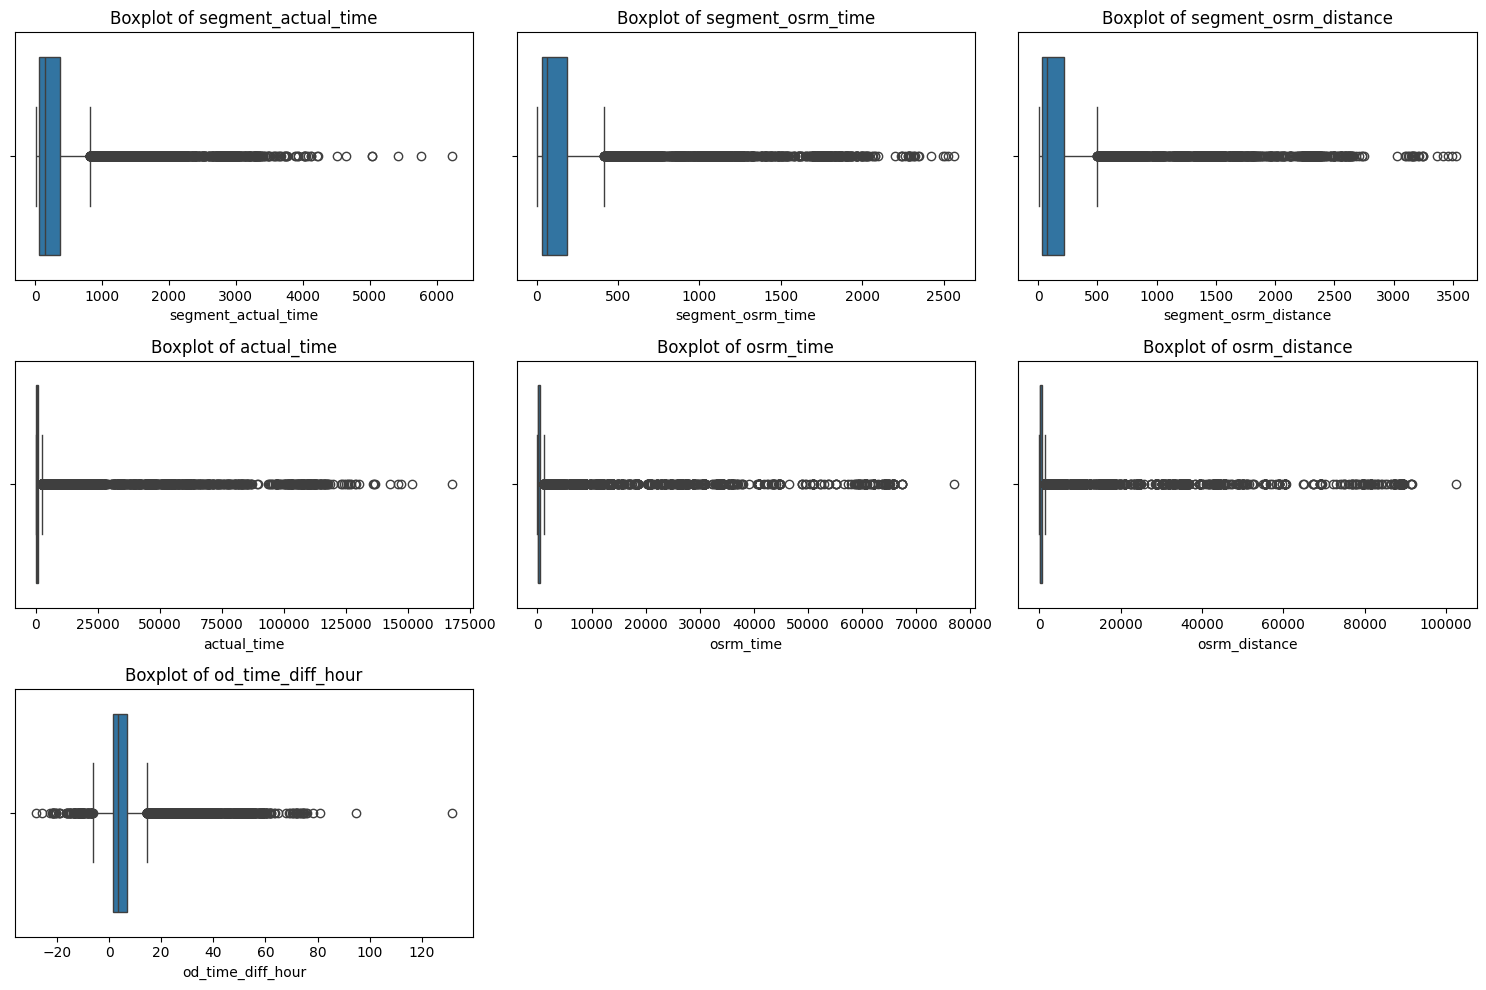

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=trip_level_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
#  Remove outliers
for col, (lower, upper) in outlier_bounds.items():
    trip_level_df = trip_level_df[(trip_level_df[col] >= lower) & (trip_level_df[col] <= upper)]


In [ ]:
# one-hot encoding on categorical features.
categorical_cols = ['route_type', 'source_center', 'destination_center',
                    'source_city', 'source_state', 'destination_city', 'destination_state']


trip_level_encoded = pd.get_dummies(trip_level_df, columns=existing_cat_cols,
                                    drop_first=True)  # drop_first=True avoids dummy variable trap


In [ ]:
actual_time = trip_level_df['actual_time']
osrm_time = trip_level_df['osrm_time']
segment_actual_time = trip_level_df['segment_actual_time']
segment_osrm_distance = trip_level_df['segment_osrm_distance']
segment_osrm_time = trip_level_df['segment_osrm_time']

In [ ]:
''' paired t test'''
# actual_time vs osrm_time
stat_a, pval_a = ttest_rel(actual_time, osrm_time)
print(f"a) Actual vs OSRM time: t-stat={stat_a:.3f}, p-val={pval_a:.3f}")

#  actual_time vs segment_actual_time
stat_b, pval_b = ttest_rel(actual_time, segment_actual_time)
print(f"b) Actual time vs Segment actual time: t-stat={stat_b:.3f}, p-val={pval_b:.3f}")

#  osrm_distance vs segment_osrm_distance
# Assuming you also have osrm_distance column
osrm_distance = trip_level_df['osrm_distance']
stat_c, pval_c = ttest_rel(osrm_distance, segment_osrm_distance)
print(f"c) OSRM distance vs Segment OSRM distance: t-stat={stat_c:.3f}, p-val={pval_c:.3f}")

# d. osrm_time vs segment_osrm_time
stat_d, pval_d = ttest_rel(osrm_time, segment_osrm_time)
print(f"d) OSRM time vs Segment OSRM time: t-stat={stat_d:.3f}, p-val={pval_d:.3f}")


a) Actual vs OSRM time: t-stat=94.354, p-val=0.000
b) Actual time vs Segment actual time: t-stat=87.984, p-val=0.000
c) OSRM distance vs Segment OSRM distance: t-stat=82.029, p-val=0.000
d) OSRM time vs Segment OSRM time: t-stat=87.513, p-val=0.000


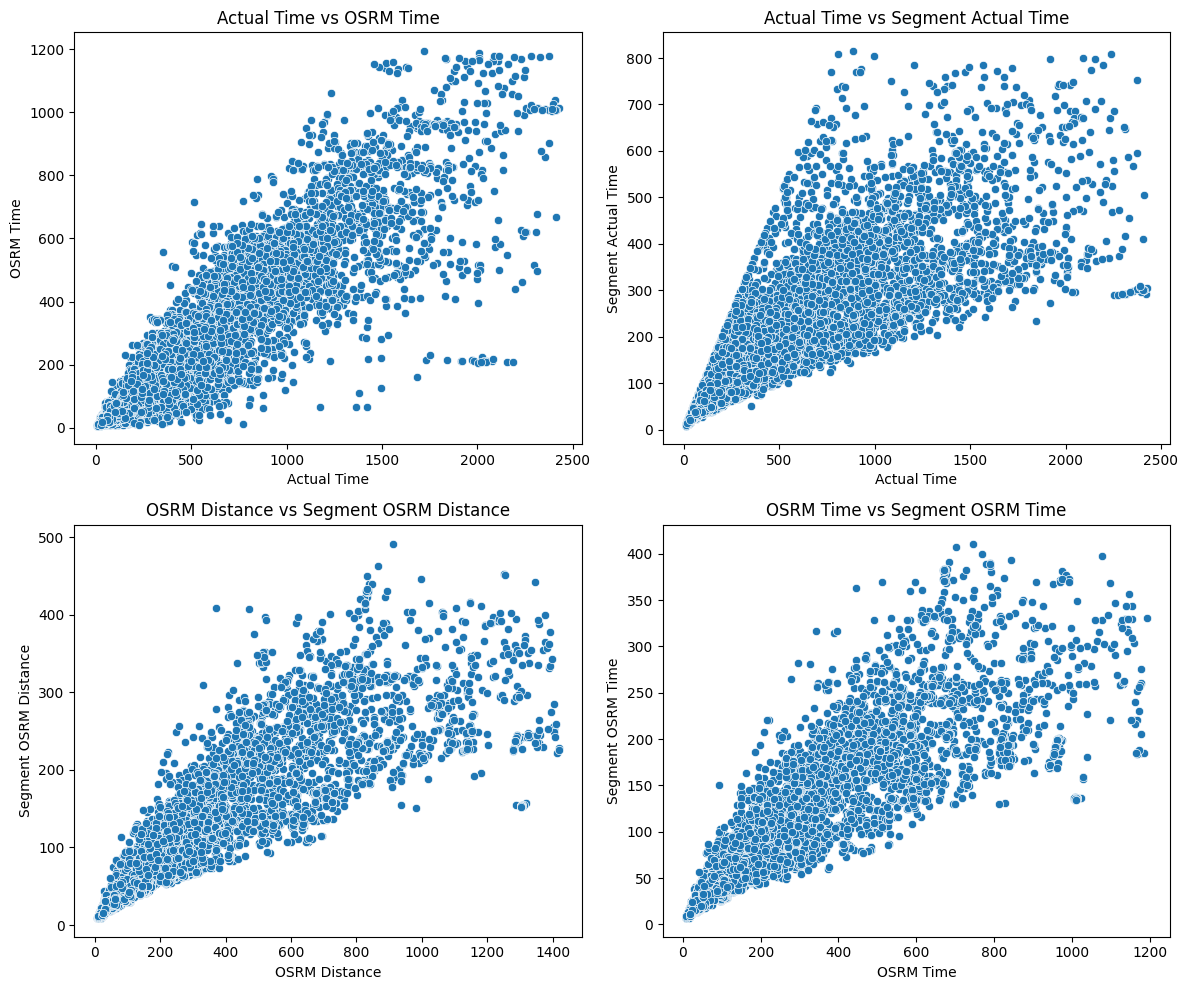

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=actual_time, y=osrm_time)
plt.title('Actual Time vs OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')

plt.subplot(2, 2, 2)
sns.scatterplot(x=actual_time, y=segment_actual_time)
plt.title('Actual Time vs Segment Actual Time')
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time')

plt.subplot(2, 2, 3)
sns.scatterplot(x=osrm_distance, y=segment_osrm_distance)
plt.title('OSRM Distance vs Segment OSRM Distance')
plt.xlabel('OSRM Distance')
plt.ylabel('Segment OSRM Distance')

plt.subplot(2, 2, 4)
sns.scatterplot(x=osrm_time, y=segment_osrm_time)
plt.title('OSRM Time vs Segment OSRM Time')
plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time')

plt.tight_layout()
plt.show()


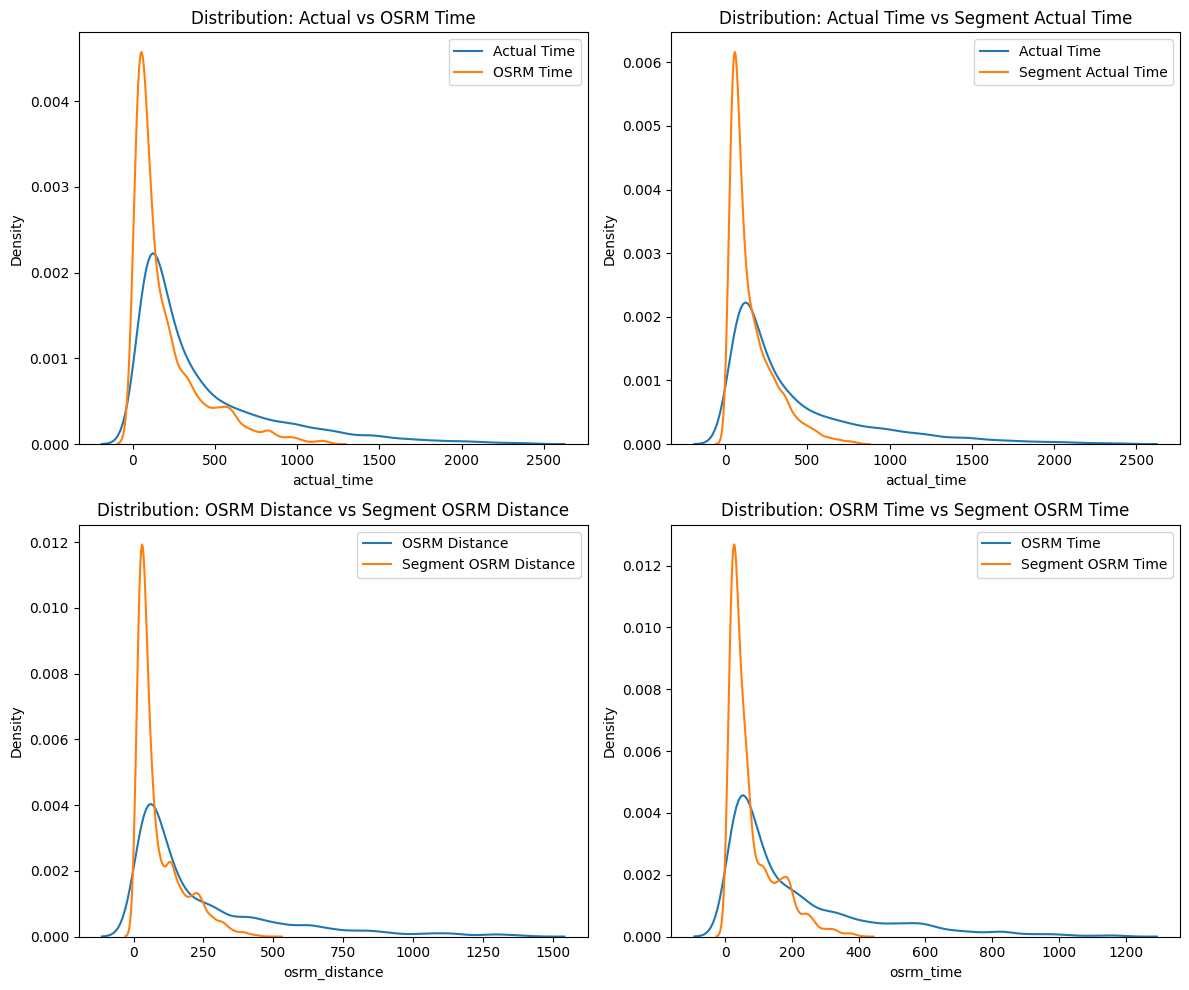

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(actual_time, label='Actual Time')
sns.kdeplot(osrm_time, label='OSRM Time')
plt.title('Distribution: Actual vs OSRM Time')
plt.legend()

plt.subplot(2, 2, 2)
sns.kdeplot(actual_time, label='Actual Time')
sns.kdeplot(segment_actual_time, label='Segment Actual Time')
plt.title('Distribution: Actual Time vs Segment Actual Time')
plt.legend()

plt.subplot(2, 2, 3)
sns.kdeplot(osrm_distance, label='OSRM Distance')
sns.kdeplot(segment_osrm_distance, label='Segment OSRM Distance')
plt.title('Distribution: OSRM Distance vs Segment OSRM Distance')
plt.legend()

plt.subplot(2, 2, 4)
sns.kdeplot(osrm_time, label='OSRM Time')
sns.kdeplot(segment_osrm_time, label='Segment OSRM Time')
plt.title('Distribution: OSRM Time vs Segment OSRM Time')
plt.legend()

plt.tight_layout()
plt.show()


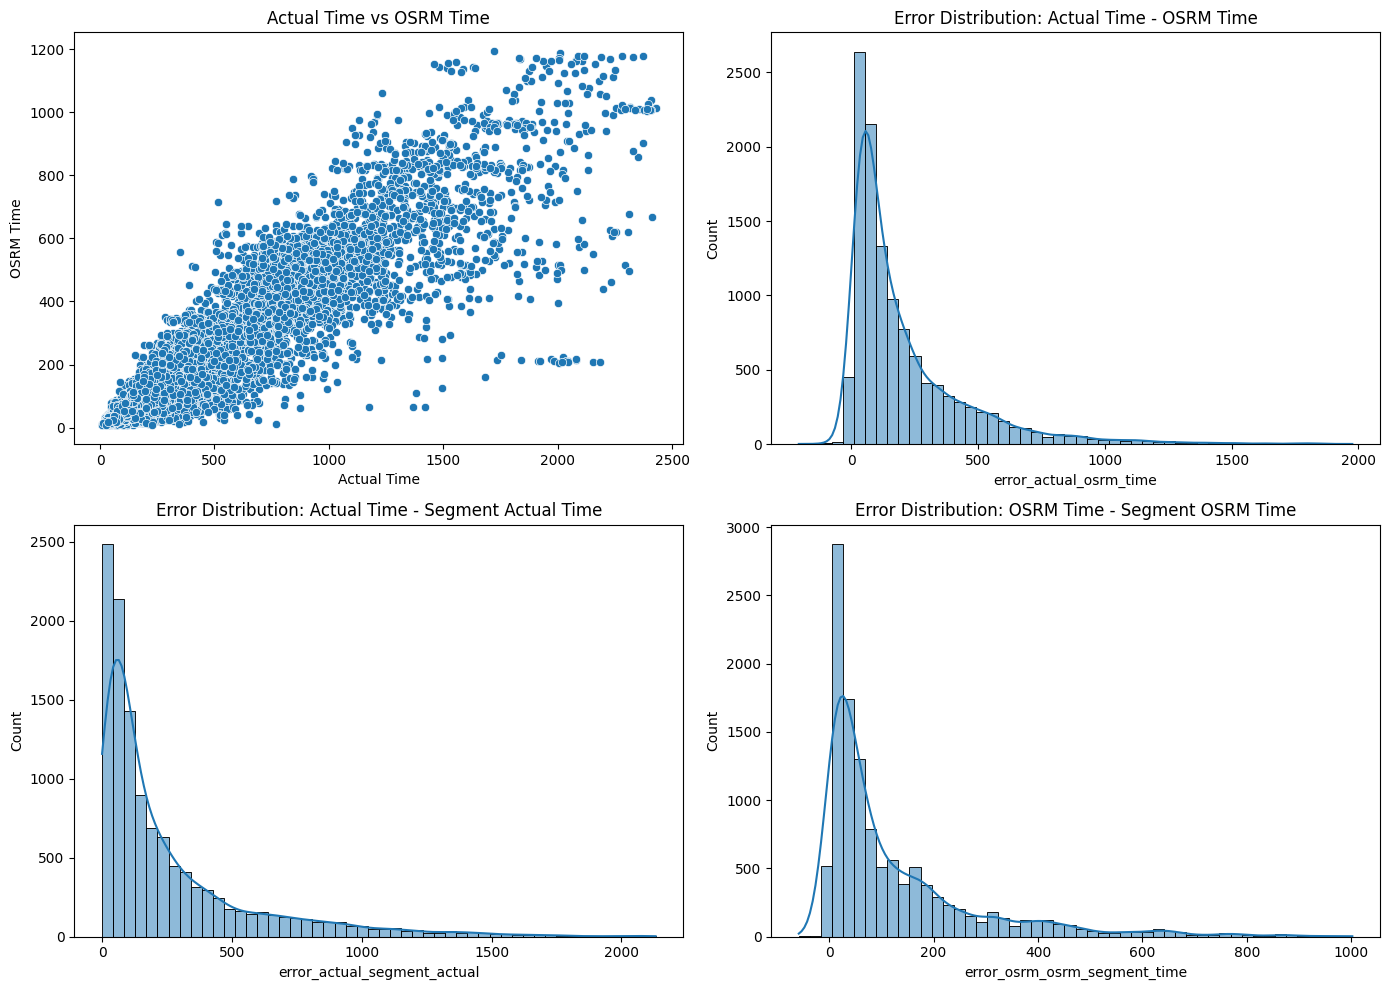

In [ ]:
trip_level_df['error_actual_osrm_time'] = trip_level_df['actual_time'] - trip_level_df['osrm_time']
trip_level_df['error_actual_segment_actual'] = trip_level_df['actual_time'] - trip_level_df['segment_actual_time']
trip_level_df['error_osrm_osrm_segment_distance'] = trip_level_df['osrm_distance'] - trip_level_df['segment_osrm_distance']
trip_level_df['error_osrm_osrm_segment_time'] = trip_level_df['osrm_time'] - trip_level_df['segment_osrm_time']

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.scatterplot(x=trip_level_df['actual_time'], y=trip_level_df['osrm_time'])
plt.title('Actual Time vs OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')

plt.subplot(2,2,2)
sns.histplot(trip_level_df['error_actual_osrm_time'], bins=50, kde=True)
plt.title('Error Distribution: Actual Time - OSRM Time')

plt.subplot(2,2,3)
sns.histplot(trip_level_df['error_actual_segment_actual'], bins=50, kde=True)
plt.title('Error Distribution: Actual Time - Segment Actual Time')

plt.subplot(2,2,4)
sns.histplot(trip_level_df['error_osrm_osrm_segment_time'], bins=50, kde=True)
plt.title('Error Distribution: OSRM Time - Segment OSRM Time')

plt.tight_layout()
plt.show()


Patterns Observed
1. Most Orders by Location
Top Source States:
The highest volume of orders originates from a small set of states. Haryana, Maharashtra, and Karnataka show up with the largest share of outgoing shipments at the source level, indicating major fulfillment hubs or e-commerce concentrations.

Top Destination States:
Similarly, orders most frequently terminate at major metro-adjacent or commerce-heavy states, with Haryana, Maharashtra, and Delhi among the most common endpoints for shipments.

2. Busiest Corridors
Definition:
A “corridor” refers to a route between a source and destination state (e.g., Haryana → Maharashtra).

Top Corridors (By Order Count):

The busiest trucking corridors are typically between high-population or industrial states, with “Haryana→Maharashtra”, “Maharashtra→Haryana”, “Delhi→Haryana”, and “Karnataka→Maharashtra” among those carrying the most volume.

These top-10 busiest corridors account for a significant share of total orders and serve as logistical arteries for the business.

Average Distance and Time:
For these corridors, the average trip distance ranges from approximately 200km to 400km, and the average time typically falls between 8–24 hours (variable by corridor configuration and real-world factors).

3. Average Metrics Per Corridor
Distance:
Corridors like Haryana→Maharashtra and Maharashtra→Haryana regularly see average distances exceeding 350km per trip.

Time:
The mean actual time for these top corridors is high—ranging from 15 hours for intra-state or short routes to 30+ hours for cross-country highways.

Inferences from Patterns
Metro/Industrial Clustering:
Key industrial, distribution, and retail hubs (NCR, Mumbai, Bangalore) serve both as busy origins and destinations for parcel traffic. This hints at both sender concentration and high final-mile density in these states.

Corridor Specialization:
A small number of state-pair corridors are core to network efficiency. Optimizations or disruptions in these routes will have an outsized impact.

Potential Congestion:
The busiest corridors might also be those with the most variable time performance, revealing operational challenges (traffic congestion, route dependencies) that merit deeper analysis.

Actionable Items for the Business
Targeted Corridor Optimization:
Focus operational improvement initiatives (driver scheduling, vehicle assignment, traffic/route prediction enhancements) on the top 5 corridors for maximum efficiency gains.

Hub Expansion Decisions:
Expand, automate, or better resource fulfillment centers in the main source states (Haryana, Maharashtra, Karnataka) to reduce bottlenecks at critical nodes.

Service Commitment Adjustments:
Set realistic delivery expectations for customers in the longest corridors, and inform sales/product teams about typical timeframes revealed in corridor analysis.

Dynamic Routing & Forecasting:
Use the highlighted average times and corridor-level performance metrics as baselines when building time-prediction or rerouting algorithms.

Monitor & React to Outliers:
Regularly flag and investigate trips whose actual times or distances deviate sharply from corridor averages, as these may indicate service failures or emerging network risks.

Resource Calibration:
Align truck allocation and staffing more closely with high-frequency corridors to avoid underutilization in low-volume routes.

Summary:
analysis confirms that a small number of industrial/commercial corridors drive the majority of logistics activity at Delhivery. By concentrating performance improvement and predictive analytics on these geographies and flows, can achieve the greatest operational ROI and customer satisfaction improvement.